### 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from numpy import nan,percentile
df=pd.read_csv("employee.csv")
df

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [2]:
print(df.describe())
print(df.info())

             age        income  performance_score
count   7.000000      7.000000           9.000000
mean   40.428571  52857.142857         610.666667
std    12.204605  26028.372797         235.671912
min    23.000000  16000.000000          53.000000
25%    31.000000  38500.000000         556.000000
50%    45.000000  52000.000000         674.000000
75%    49.500000  63500.000000         711.000000
max    54.000000  98000.000000         901.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2)

### 2. Reset the index as "name".

In [3]:
df.set_index('name')

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 3. Select rows for specific names Jack Morgan and Josh wills.

In [4]:
df.set_index('name').loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


OR

In [5]:
df.iloc[[2,7],:]

,name,age,income,gender,department,grade,performance_score
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
7,Josh Wills,54.0,52000.0,F,Finance,G3,901


### 4. Select data for multiple values "Sales"and“Finance”.

In [6]:
df.set_index('department').loc[['Sales','Finance']]

,name,age,income,gender,grade,performance_score
department,,,,,,
Sales,Ying Chin,45.0,65000.0,F,G3,556
Sales,Satyam Sharma,NaN,62000.0,NaN,G3,649
Sales,Leo Duck,23.0,98000.0,M,G4,709
Finance,S Kumar,NaN,16000.0,F,G0,520
Finance,Jack Morgan,32.0,35000.0,M,G2,674
Finance,Josh Wills,54.0,52000.0,F,G3,901


OR

In [7]:
df.loc[df['department'].isin(['Sales','Finance'])]

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


### 5. Display employee who has more than 700 performance score.

In [8]:
print("Employees have more than 700 perfornamnce score are: \n",df.loc[(df['performance_score'] >= 700)].set_index('name').index)


Employees have more than 700 perfornamnce score are: 
 Index(['Allen Smith', 'Dheeraj Patel', 'Josh Wills', 'Leo Duck'], dtype='object', name='name')


### 6. Display employee who has more than 500 and less than 700 performance score

In [9]:
print("Employees have more than 500 and less than 700 perfornamnce score are: \n",df.loc[(df['performance_score'] >= 500) & (df['performance_score'] <= 700)].set_index('name').index)



Employees have more than 500 and less than 700 perfornamnce score are: 
 Index(['S Kumar', 'Jack Morgan', 'Ying Chin', 'Satyam Sharma'], dtype='object', name='name')


### 7. Check and handle missing values in the dataset.

In [10]:
 df.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

#### income, gender, age contains missing values

In [11]:
new_df = df
new_df['age']=new_df['age'].fillna(new_df['age'].median())
new_df['income']=new_df['income'].fillna(new_df['income'].median())
new_df['gender']=new_df['gender'].fillna(new_df['gender'].mode()[0])
#new_df['gender']=new_df['gender'].replace(nan,'F')
new_df

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,52000.0,F,Operations,G3,723
1,S Kumar,45.0,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,45.0,62000.0,F,Sales,G3,649
6,James Authur,54.0,52000.0,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


### 8. Check the outliers and handle outliers in performance score using Percentiles.

<AxesSubplot:>

<Figure size 1224x216 with 0 Axes>

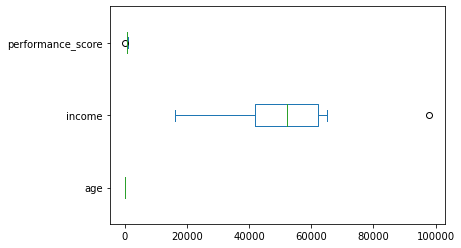

In [12]:
plt.figure(figsize=(17,3))
df.plot(kind='box', vert=False)

#### outlier present in income and performance score

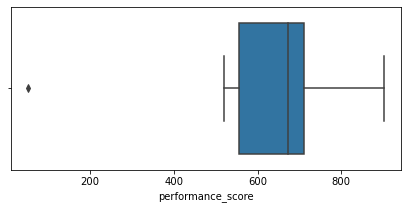

In [13]:
plt.figure(figsize=(7,3))
sns.boxplot(x=df['performance_score'])
plt.show()

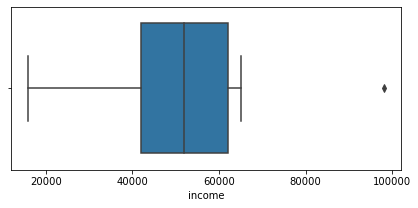

In [14]:
plt.figure(figsize=(7,3))
sns.boxplot(x=df['income'])
plt.show()

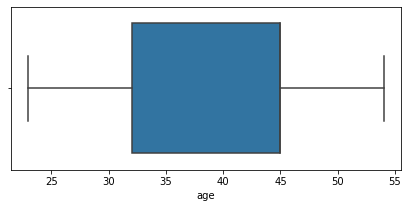

In [15]:
plt.figure(figsize=(7,3))
sns.boxplot(x=df['age'])
plt.show()

In [16]:
# calculate interquartile range
q25, q75 = percentile(df['performance_score'], 25), percentile(df['performance_score'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=556.000, 75th=711.000, IQR=155.000


In [17]:
#calculate cutoff for outliers
cutoff=iqr*1.5
lower, upper = q25 - cutoff, q75 + cutoff
#identify outliers
outliers = [x for x in df['performance_score'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers),outliers)

Identified outliers: 1 [53]


In [18]:
# Remove outliers
outliers_removed = [x for x in df['performance_score'] if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed),outliers_removed)

Non-outlier observations: 8 [723, 520, 674, 556, 711, 649, 901, 709]


#### outlier 53 removed and data displayed

### 9. Check the gender column and do Dummy encoding.

In [19]:
df['gender']

0    F
1    F
2    M
3    F
4    F
5    F
6    F
7    F
8    M
Name: gender, dtype: object

In [20]:
df_dc = pd.get_dummies(df, columns=['gender'])
df_dc

,name,age,income,department,grade,performance_score,gender_F,gender_M
0,Allen Smith,45.0,52000.0,Operations,G3,723,1,0
1,S Kumar,45.0,16000.0,Finance,G0,520,1,0
2,Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
3,Ying Chin,45.0,65000.0,Sales,G3,556,1,0
4,Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
5,Satyam Sharma,45.0,62000.0,Sales,G3,649,1,0
6,James Authur,54.0,52000.0,Operations,G3,53,1,0
7,Josh Wills,54.0,52000.0,Finance,G3,901,1,0
8,Leo Duck,23.0,98000.0,Sales,G4,709,0,1


### 10.Do the standard scaling on the feature performance score.

In [21]:
df['performance_score']

0    723
1    520
2    674
3    556
4    711
5    649
6     53
7    901
8    709
Name: performance_score, dtype: int64

In [22]:
df['performance_score'].describe()

count      9.000000
mean     610.666667
std      235.671912
min       53.000000
25%      556.000000
50%      674.000000
75%      711.000000
max      901.000000
Name: performance_score, dtype: float64

In [23]:
x =np.array(df['performance_score']).reshape(-1, 1)
from sklearn import preprocessing 
standardisation = preprocessing.StandardScaler()
df_StdScaled = standardisation.fit_transform(x)
df_StdScaled = pd.DataFrame(df_StdScaled)
df_StdScaled.describe().round()

,0
count,9.0
mean,0.0
std,1.0
min,-3.0
25%,-0.0
50%,0.0
75%,0.0
max,1.0
